In [1]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')

from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

import matplotlib.patches as patches
from matplotlib import patches as mpatches
from collections import OrderedDict, defaultdict
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

from tqdm import tnrange, tqdm_notebook
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


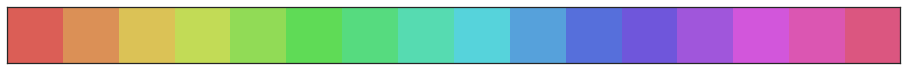

In [2]:
sns.set_style("white")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']

# Plot RBP map (raw density)

In [3]:
import sys
sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline

def get_lines(d, c=0.95):
    density_incl = dline.LineObject(
        event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
        annotation='Included upon knockdown',
        conf=c,
        color=d['included']['color'],
        min_event_threshold=100
    )
    density_excl = dline.LineObject(
        event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
        annotation='Excluded upon knockdown',
        conf=c,
        color=d['excluded']['color'],
        min_event_threshold=100
    )
    density_bg = dline.LineObject(
        event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
        annotation='Native cassettes',
        conf=c,
        color=d['background']['color'],
        min_event_threshold=100
    )
    return density_incl, density_excl, density_bg

In [4]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

In [5]:
density = defaultdict(dict)

hnrnpk_density_included = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.0.conf0.95.HNRNPK-BGHLV12-HepG2-included-upon-knockdown.normed_matrix.txt')
hnrnpk_density_excluded = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.0.conf0.95.HNRNPK-BGHLV12-HepG2-excluded-upon-knockdown.normed_matrix.txt')
hnrnpk_density_native_cass = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.0.conf0.95.HepG2_native_cassette_exons.normed_matrix.txt')

density['included'] = {
    'matrix':hnrnpk_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':hnrnpk_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':hnrnpk_density_native_cass,
    'color':density_colors[2]
}

In [8]:
def plot(incl, excl, bg, d, fontsize=8, yticks=[], yticklabels=[], title='Normalized Read Density'):
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

    axs = [ax1, ax2, ax3, ax4]

    RDPlotter.plot_se([incl, excl, bg], axs, density_colors) # density_bg
    ax1.set_ylabel(title, size=fontsize)
    if len(yticklabels) != 0:
        ax1.yaxis.set_ticks(yticks)
        ax2.yaxis.set_ticks(yticks)
        ax3.yaxis.set_ticks(yticks)
        ax4.yaxis.set_ticks(yticks)
        ax1.yaxis.set_ticklabels(yticklabels)
        

    # plt.tight_layout()
    
    incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Included upon KD')
    excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excluded upon KD')
    
    for ax in axs:
        ax.tick_params(labelsize=fontsize)
    for ax in axs[1:3]:
        sns.despine(ax=ax, top=True, left=True, right=True)
    
    sns.despine(ax=axs[0], top=True, left=False, right=True)
    sns.despine(ax=axs[3], top=True, left=True, right=False)
    
    # ax1.yaxis.set_ticks([0,0.1,0.2,0.3])
    # ax1.yaxis.set_ticklabels([-2,0,2])
    
    leg = axs[0].legend(
        bbox_to_anchor=(2.5, -0.6), loc=1, mode="expand",
        # bbox_to_anchor=(2.35, -0.5), loc=1, mode="expand",
        handles=[incl_density_patch, excl_density_patch],
        borderaxespad=0., ncol=2, fontsize=fontsize
    )

((860, 1400), 'Included upon knockdown (860 events)')
((523, 1400), 'Excluded upon knockdown (523 events)')
((2555, 1400), 'Native cassettes (2555 events)')


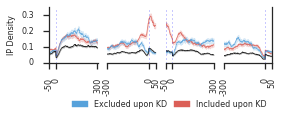

In [9]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density, yticks=[0,0.1,0.2,0.3],yticklabels=[0,0.1,0.2,0.3], title='IP Density')
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/206_01_HNRNPK_ip_density.svg')
# plt.clf()
# plt.cla()

# Plot RBP map  (Input)

In [10]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

hnrnpk_density_included = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.3.conf0.95.HNRNPK-BGHLV12-HepG2-included-upon-knockdown.normed_matrix.txt')
hnrnpk_density_excluded = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.3.conf0.95.HNRNPK-BGHLV12-HepG2-excluded-upon-knockdown.normed_matrix.txt')
hnrnpk_density_native_cass = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.3.conf0.95.HepG2_native_cassette_exons.normed_matrix.txt')

In [11]:
density = defaultdict(dict)

density['included'] = {
    'matrix':hnrnpk_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':hnrnpk_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':hnrnpk_density_native_cass,
    'color':density_colors[2]
}

((860, 1400), 'Included upon knockdown (860 events)')
((523, 1400), 'Excluded upon knockdown (523 events)')
((2555, 1400), 'Native cassettes (2555 events)')


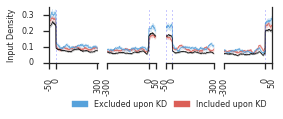

In [12]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density, yticks=[0,0.1,0.2,0.3], yticklabels=[0,0.1,0.2,0.3], title="Input Density")
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/206_01_HNRNPK_input_density.svg')
# plt.clf()
# plt.cla()

# Now plot the normalized version

In [13]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'
hnrnpk_density_included = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.1.conf0.95.HNRNPK-BGHLV12-HepG2-included-upon-knockdown.normed_matrix.txt')
hnrnpk_density_excluded = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.1.conf0.95.HNRNPK-BGHLV12-HepG2-excluded-upon-knockdown.normed_matrix.txt')
hnrnpk_density_native_cass = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.1.conf0.95.HepG2_native_cassette_exons.normed_matrix.txt')

In [14]:
density = defaultdict(dict)

density['included'] = {
    'matrix':hnrnpk_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':hnrnpk_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':hnrnpk_density_native_cass,
    'color':density_colors[2]
}

((860, 1400), 'Included upon knockdown (860 events)')
((523, 1400), 'Excluded upon knockdown (523 events)')
((2555, 1400), 'Native cassettes (2555 events)')


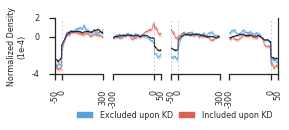

In [15]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density, yticks=[-0.0004,0,0.0002], yticklabels=['-4','0','2'], title="Normalized Density\n(1e-4)")
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/206_01_HNRNPK_normalized_subtract_density.svg')
# plt.clf()
# plt.cla()

# Plot the entropy normalized version

In [16]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'
hnrnpk_density_included = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.2.conf0.95.HNRNPK-BGHLV12-HepG2-included-upon-knockdown.normed_matrix.txt')
hnrnpk_density_excluded = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.2.conf0.95.HNRNPK-BGHLV12-HepG2-excluded-upon-knockdown.normed_matrix.txt')
hnrnpk_density_native_cass = os.path.join(density_dir, '206_01_HNRNPK.merged.r2.2.conf0.95.HepG2_native_cassette_exons.normed_matrix.txt')

In [17]:
density = defaultdict(dict)

density['included'] = {
    'matrix':hnrnpk_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':hnrnpk_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':hnrnpk_density_native_cass,
    'color':density_colors[2]
}

((860, 1400), 'Included upon knockdown (860 events)')
((523, 1400), 'Excluded upon knockdown (523 events)')
((2555, 1400), 'Native cassettes (2555 events)')


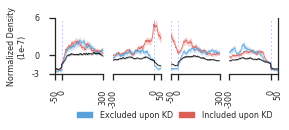

In [18]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density, yticks=[-0.0000003, 0, 0.0000006], yticklabels=['-3','0','6'], title='Normalized Density\n(1e-7)')
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/206_01_HNRNPK_normalized_entropy_density.svg')
# plt.clf()
# plt.cla()